### Bank Term Deposit Subscription

**About dataset:**The dataset is from a bank, using which we have to predict whether the subject subscribes to a term deposit or not.<br/>

**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\nites\\UPXLearning\\2_MachineLearning\\Logistic_Regression\\Logistic_Assignment'

In [49]:
bank_data = pd.read_csv("bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Top 6 rows of dataset

**Let's see the datatypes of the variables**

In [50]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [51]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

### Question: Perform Descriptive Statistics on the dataset

In [52]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Question: Remove missing values from the data frame if any

In [53]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [54]:
## There is no data missing 
## Data Preprocessing (Feature Engineering)... creating dummy codes , handling Ordinal and categorical columns 

In [55]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [56]:
for col in bank_data.columns:
    if bank_data[col].dtype == 'object':
        print('************',col,'*************')
        print(bank_data[col].value_counts())


************ job *************
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
************ marital *************
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
************ education *************
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
************ default *************
no     4445
yes      76
Name: default, dtype: int64
************ housing *************
yes    2559
no     1962
Name: housing, dtype: int64
************ loan *************
no     3830
yes     691
Name: loan, dtype: int64
************ contact *************
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
************ month *************
may    1398
jul     706
aug     633

In [57]:
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day', 'poutcome', 'y']
num_col=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [58]:
eda_data = bank_data.copy(True)

In [59]:
eda_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [60]:
from sklearn.preprocessing import LabelEncoder
eda_data[categorical_col] = eda_data[categorical_col].apply(LabelEncoder().fit_transform)

In [61]:
eda_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,18,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,10,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,15,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,2,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,4,8,226,1,-1,0,3,0


In [62]:
from sklearn.preprocessing import minmax_scale
eda_data[num_col] = minmax_scale(eda_data[num_col])

In [63]:
eda_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.161765,10,1,0,0,0.068455,0,0,0,18,10,0.024826,0.000000,0.000000,0.00,3,0
1,0.205882,7,1,1,0,0.108750,1,1,0,10,8,0.071500,0.000000,0.389908,0.16,0,0
2,0.235294,4,2,2,0,0.062590,1,0,0,15,0,0.059914,0.000000,0.379587,0.04,0,0
3,0.161765,4,1,2,0,0.064281,1,1,2,2,6,0.064548,0.061224,0.000000,0.00,3,0
4,0.588235,1,1,1,0,0.044469,1,0,2,4,8,0.073486,0.000000,0.000000,0.00,3,0


In [64]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   int32  
 2   marital    4521 non-null   int32  
 3   education  4521 non-null   int32  
 4   default    4521 non-null   int32  
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   int32  
 7   loan       4521 non-null   int32  
 8   contact    4521 non-null   int32  
 9   day        4521 non-null   int64  
 10  month      4521 non-null   int32  
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   int32  
 16  y          4521 non-null   int32  
dtypes: float64(6), int32(10), int64(1)
memory usage: 424.0 KB


now all categorical columns changed to numeric values and all othe Numerical eatures are now Normalized 

### Question: Perform EDA and find any correlation

In [65]:
# Data distribution
import matplotlib.pyplot as plt

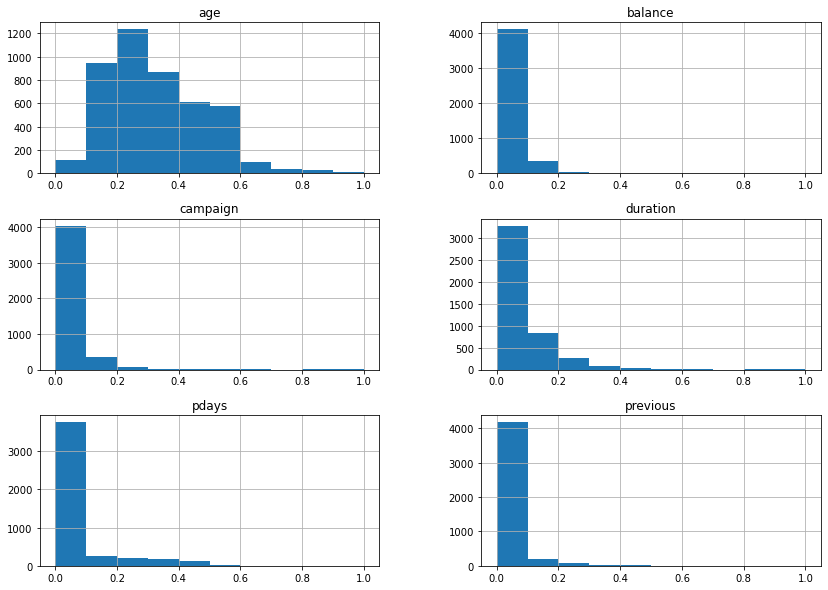

In [66]:
eda_data[num_col].hist(bins=10, figsize=(14,10))
plt.show()

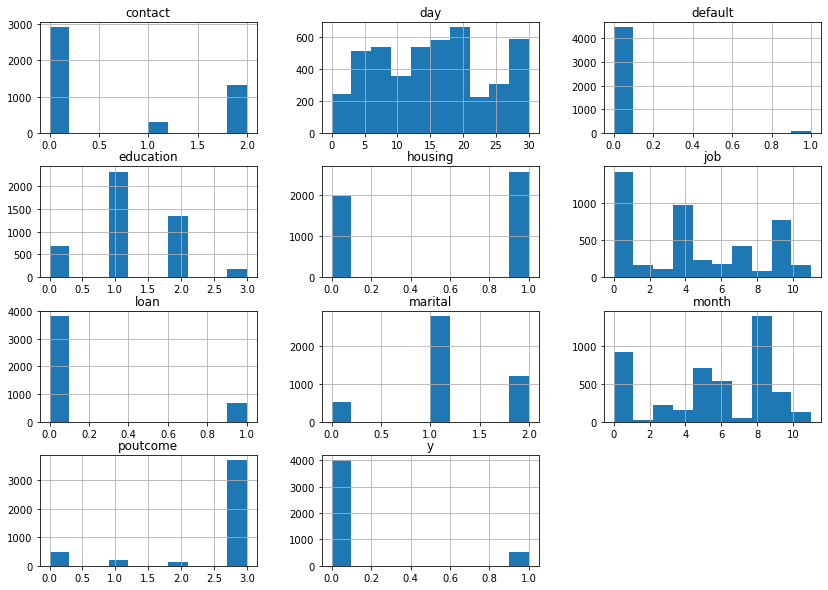

In [67]:
eda_data[categorical_col].hist(bins=10, figsize=(14,10))
plt.show()

In [68]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


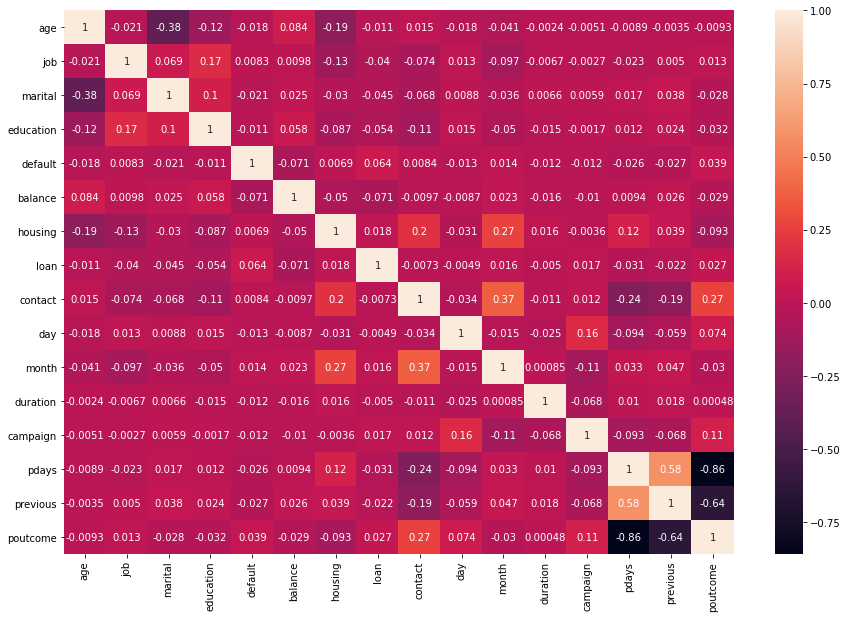

In [69]:
X=eda_data.drop(columns='y')
Y=eda_data['y'].values
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(), annot=True )
plt.show()

In [70]:
# Previous and pdays are highly co-related with eaother as well as with poutcome. Hence to remove multi co-liniarity dropping these two columns

X.drop(columns=['previous','pdays'], inplace=True )

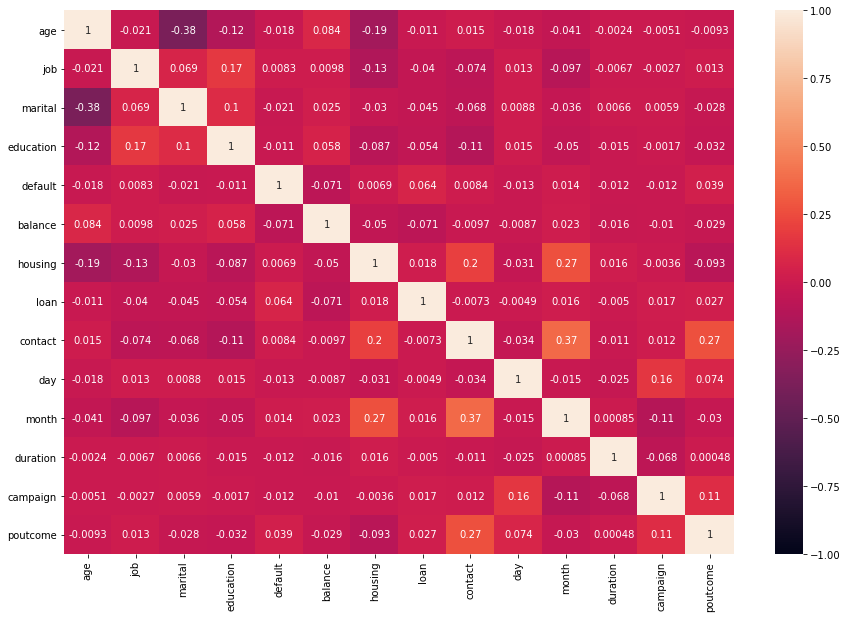

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(), annot=True,vmin=-1,vmax=1 )
plt.show()

In [72]:
ct = pd.crosstab(bank_data.job, bank_data.y, normalize='index')

In [73]:
 stacked = ct.stack().reset_index().rename(columns={0:'value'})

In [74]:
ct

y,no,yes
job,,
admin.,0.878661,0.121339
blue-collar,0.927061,0.072939
entrepreneur,0.910714,0.089286
housemaid,0.875000,0.125000
management,0.864809,0.135191
retired,0.765217,0.234783
self-employed,0.890710,0.109290
services,0.908873,0.091127
student,0.773810,0.226190


In [75]:
stacked

,job,y,value
0,admin.,no,0.878661
1,admin.,yes,0.121339
2,blue-collar,no,0.927061
3,blue-collar,yes,0.072939
4,entrepreneur,no,0.910714
5,entrepreneur,yes,0.089286
6,housemaid,no,0.875000
7,housemaid,yes,0.125000
8,management,no,0.864809
9,management,yes,0.135191


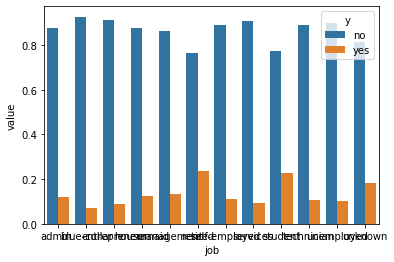

In [76]:
# plot grouped bar chart
sns.barplot(x=stacked.job, y=stacked.value, hue=stacked.y)
plt.show()

In [77]:
pd.crosstab(bank_data.education, bank_data.y, normalize='index')

y,no,yes
education,,
primary,0.905605,0.094395
secondary,0.893755,0.106245
tertiary,0.857037,0.142963
unknown,0.898396,0.101604


In [78]:
pd.crosstab(bank_data.age, bank_data.y, normalize='index')

y,no,yes
age,,
19,0.500000,0.500000
20,0.666667,0.333333
21,0.857143,0.142857
22,0.666667,0.333333
23,0.900000,0.100000
...,...,...
81,1.000000,0.000000
83,0.500000,0.500000
84,0.000000,1.000000


In [79]:
pd.crosstab(bank_data.housing, bank_data.y, normalize='index')

y,no,yes
housing,,
no,0.846585,0.153415
yes,0.914029,0.085971


In [80]:
pd.crosstab(bank_data.loan, bank_data.y, normalize='index')

y,no,yes
loan,,
no,0.875196,0.124804
yes,0.937771,0.062229


### Question: Perform classification using Logistic Regression and analyse the metrics

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()


In [84]:
model.fit(x_train,y_train)

C:\Users\nites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = model.predict(x_test)

In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.47      0.12      0.20       152

    accuracy                           0.89      1357
   macro avg       0.69      0.55      0.57      1357
weighted avg       0.85      0.89      0.86      1357



In [88]:
print(metrics.confusion_matrix(y_test,y_pred))

[[1184   21]
 [ 133   19]]


In [89]:
len(y_test)

1357

In [91]:
print('Accuracy score for the model on test data: ',metrics.accuracy_score(y_test,y_pred))

Accuracy score for the model on test data:  0.8865143699336773
